# SVM Kelas Jamak (Multi-Class)

Walaupun SVM pertama kali diterapkan hanya untuk dua kelas (+1 atau -1) tetapi dalam perkembangannya metode ini bisa juga diterapkan untuk lebih dari dua kelas. Terdapat dua metode yang saat ini diterapkan yaitu "one-vs-one" (ovo) dan "one-vs-rest" (ovr). Karena ada tiga kelas, sebagai bahan latihan dapat menggunakan data iris antara lain untuk data latih ("iris_train.csv") dan data uji/validasi ("iris_test.csv").

## Menyiapkan Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import pustaka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [30]:
# Mengambil data dari file csv
datairis = pd.read_csv('/content/drive/MyDrive/Ghiraldy_Patrick_Toshka_Anggawan/datairistrain.csv')
df = pd.DataFrame(datairis,columns=['sepal_length','sepal_width','petal_length','petal_width','species'])
X = np.asarray(datairis)
X_train = X[:, :4]
y_train = X[:, 4]
y_train = y_train.reshape(-1, 1)

# Mengambil data validasi
datavalidasi = pd.read_csv('/content/drive/MyDrive/Ghiraldy_Patrick_Toshka_Anggawan/datairistest.csv')
df2 = pd.DataFrame(datavalidasi,columns=['sepal_length','sepal_width','petal_length','petal_width','species'])
X2 = np.asarray(datavalidasi)
X_val = X2[:, :4]
y_val = X2[:, 4]
y_val = y_val.reshape(-1, 1)

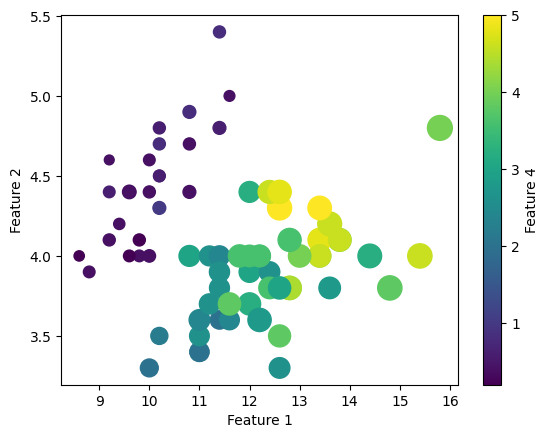

In [34]:
# Memisahkan data menjadi fitur
x = [point[0] * 2 for point in X_train]
y = [point[1] + 1 for point in X_train]
size = [point[2] * 50 for point in X_train]  # Skala ukuran titik berdasarkan fitur 3
color = [point[3] * 2 for point in X_train]  # Warna titik berdasarkan fitur 4

# Membuat scatter plot
plt.scatter(x, y, s=size, c=color, cmap='viridis')

# Mengatur label sumbu x dan y
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Menambahkan colorbar
colorbar = plt.colorbar()
colorbar.set_label('Feature 4')

# Menampilkan plot
plt.show()

## Membaut model

Di sini kita menggunakan fungsi kernel "Radial Basis"

In [35]:
# model SVM
model = svm.SVC(kernel='rbf', gamma=0.7, C=5)
model.fit(X_train, y_train.ravel())

SVC(C=5, gamma=0.7)

Selain dgn fungsi kernel Radial Basis yang baru saja kita gunakan, jenis lainnya layak dicoba, antara lain:
- Linear : "svm.SVC(kernel='linear',C=C)
- Linear SVC : "svm.LinearSVC(C=C,max_iter=10000)"
- Polinomial : "svm.SVC(kernel='poly',degree=3,gamma='auto',C=C)

Jalankan dan pastikan akurasinya muncul. Lebih akurat (100%) jika dibandingkan dgn menggunakan KNN di babsebelumnya (98%).

In [36]:
y_pred = models.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       0.96      0.92      0.94        26
         2.0       0.92      0.96      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75

